In [1]:
import numpy             as np
import matplotlib.pyplot as plt
from matplotlib          import rc 
from tqdm import tqdm

Queremos calcular el segundo momento de la distribución usando el método de Montecarlo.
$$ x \sim exp(4) $$ 
$$ f(x) = \frac{1}{4}e^{\frac{-x}{4}} $$  
$$ E(x^{2}) = \int_{0}^{\infty}\frac{1}{4} x^{2} e^{\frac{-x}{4}} dx = 32$$

Hacer cambio de variable $y = \frac{1}{1+x}$

In [2]:
def FunctionExp(y):
    
    if(y.any() != 0):
        return ( (1/y -1)**2*np.exp( -(1/y-1)/4 ) )/(4*y**2)
    else:
        return 0
    
def IntegralExacta():
    return 32.

In [3]:
def MCIntegral(N = 100):
    
    x = np.random.rand(N)
    
    return np.average(FunctionExp(x))

In [6]:
Integral = MCIntegral(N = 100000)
print(Integral)

32.26519823892494


In [7]:
n_intentos = 8
puntos = np.int_(np.logspace(2,6,n_intentos))
print(puntos)

[    100     372    1389    5179   19306   71968  268269 1000000]


In [9]:
error = np.zer(n_intentos)


for i in range(n_intentos):
    a = IntegralExacta()
    b = MCIntegral(N = puntos[i])
    error[i] = np.abs( (a-b)/a )
    
print(error)

[0.12453548 0.09556033 0.03838618 0.01856632 0.01217388 0.00822737
 0.00539391 0.0011384 ]


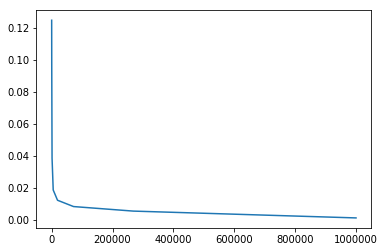

In [10]:
plt.plot(puntos,error)